In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# for model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
import pickle
import joblib

In [4]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [10]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [11]:
print(sum(df['sex'] == 1))  # men in dataset
print(sum(df['sex'] == 0))  # women in dataset

713
312


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.shape

(1025, 14)

In [15]:
# Identify numerical and categorical columns
columns_to_scale = ['oldpeak', 'thalach', 'chol', 'trestbps', 'age']
encoded_columns = ['thal', 'ca', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

In [16]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

# Gender Analysis

In [17]:
df_male = df[(df['sex'] == 1)]
df_female = df[(df['sex'] == 0)]

num_male = df_male.shape[1]
num_female = df_male.shape[0]

C:\Users\RACHIT GALA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\RACHIT GALA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\RACHIT GALA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\RACHIT GALA\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


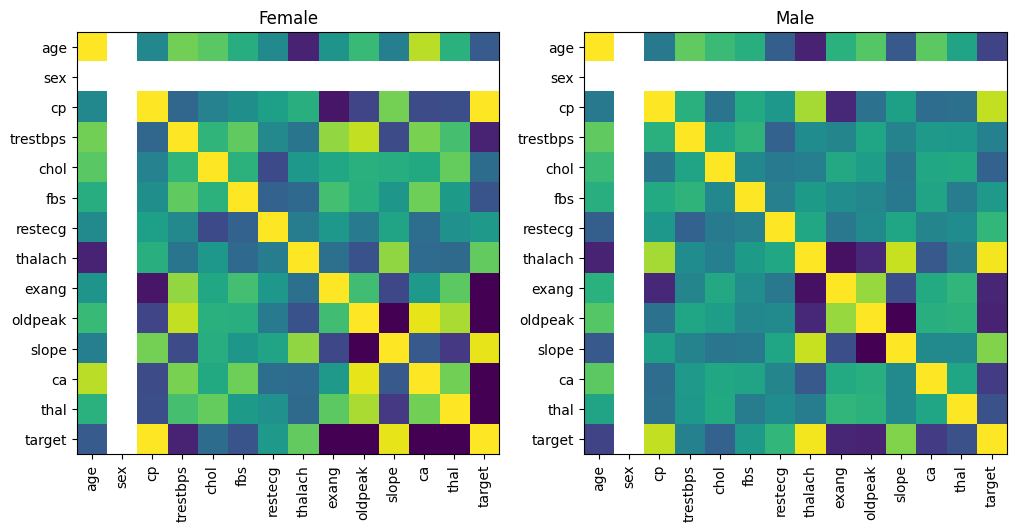

In [18]:
#pairwise correlation across all features per gender group
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(np.corrcoef(df_female.T), vmin=-.5, vmax=.5)

plt.title('Female')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.subplot(122)
plt.imshow(np.corrcoef(df_male.T), vmin=-.5, vmax=.5)

plt.title('Male')
plt.xticks(range(df.shape[1]),  df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.show()

In [19]:
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()

In [20]:
df_female = df_female.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [21]:
df_male = df_male.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [23]:
# Run the same log reg clf (stratified 10fold) for each gender group:
var_cat = ['chest_pain','fast_blood_sugar','rest_ekg','exercise_angina','slope','vessels_colored','thal']
n_it = 10
kf = StratifiedKFold(n_splits=n_it)

In [24]:
print(var_cat)

['chest_pain', 'fast_blood_sugar', 'rest_ekg', 'exercise_angina', 'slope', 'vessels_colored', 'thal']


In [25]:
print(df_female.columns)

Index(['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol',
       'fast_blood_sugar', 'rest_ekg', 'max_heart_rate', 'exercise_angina',
       'oldpeak', 'slope', 'vessels_colored', 'thal', 'target'],
      dtype='object')


In [26]:
clf = LogisticRegression(penalty='l1', solver='liblinear',tol=1e-6, max_iter=int(1e6), warm_start=True,intercept_scaling=10000., multi_class='ovr')

X = pd.get_dummies(df_female, columns= var_cat)
y_female = X["target"]
y_female[y_female > 0] = 1
X = X.drop(columns=['sex', 'target', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []

(312, 25) Index(['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'oldpeak', 'chest_pain_0', 'chest_pain_1', 'chest_pain_2',
       'chest_pain_3', 'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1',
       'rest_ekg_2', 'exercise_angina_1', 'slope_0', 'slope_1', 'slope_2',
       'vessels_colored_0', 'vessels_colored_1', 'vessels_colored_2',
       'vessels_colored_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


C:\Users\RACHIT GALA\AppData\Local\Temp\ipykernel_8636\3375329139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_female[y_female > 0] = 1


In [27]:
for it, (train, test) in enumerate(kf.split(X, y_female)):
    print(y_female.iloc[train].shape)
    clf.fit(X.iloc[train], y_female.iloc[train])
    y_true = y_female.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    # print(y_pred.shape)
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it, tr.shape, te.shape, accs[it])
    # print(clf.classes_)
    # print("coeffs: ", clf.coef_.shape)
    coefs.append(clf.coef_.ravel())
print('Female: %f+/-%f' % (np.mean(accs), np.std(accs)))
coefs_f = np.asarray(coefs)
cols_f = X.columns

(280,)
(280,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
Female: 0.932863+/-0.041378


In [28]:
coefs_f.shape

(10, 25)

In [29]:
# Male:
# y = df_male["num"]
# X = df_male.drop('num',axis=1)
# X = X.drop(columns=['sex','fbs','exang'])
X = pd.get_dummies(df_male, columns=var_cat)
y_male = X["target"]
y_male[y_male > 0] = 1
X = X.drop(columns=['sex','target', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []
for it, (train, test) in enumerate(kf.split(X, y_male)):
    clf.fit(X.iloc[train], y_male.iloc[train])
    y_true = y_male.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it,tr.shape,te.shape,accs[it])
    coefs.append(clf.coef_.ravel())
print('Male: %f+/-%f' % (np.mean(accs),np.std(accs)))
coefs_m = np.asarray(coefs)
cols_m = X.columns

(713, 26) Index(['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'oldpeak', 'chest_pain_0', 'chest_pain_1', 'chest_pain_2',
       'chest_pain_3', 'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1',
       'rest_ekg_2', 'exercise_angina_1', 'slope_0', 'slope_1', 'slope_2',
       'vessels_colored_0', 'vessels_colored_1', 'vessels_colored_2',
       'vessels_colored_3', 'vessels_colored_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')


C:\Users\RACHIT GALA\AppData\Local\Temp\ipykernel_8636\3686506223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_male[y_male > 0] = 1


Male: 0.827387+/-0.037123


In [30]:
coefs_m.shape

(10, 26)

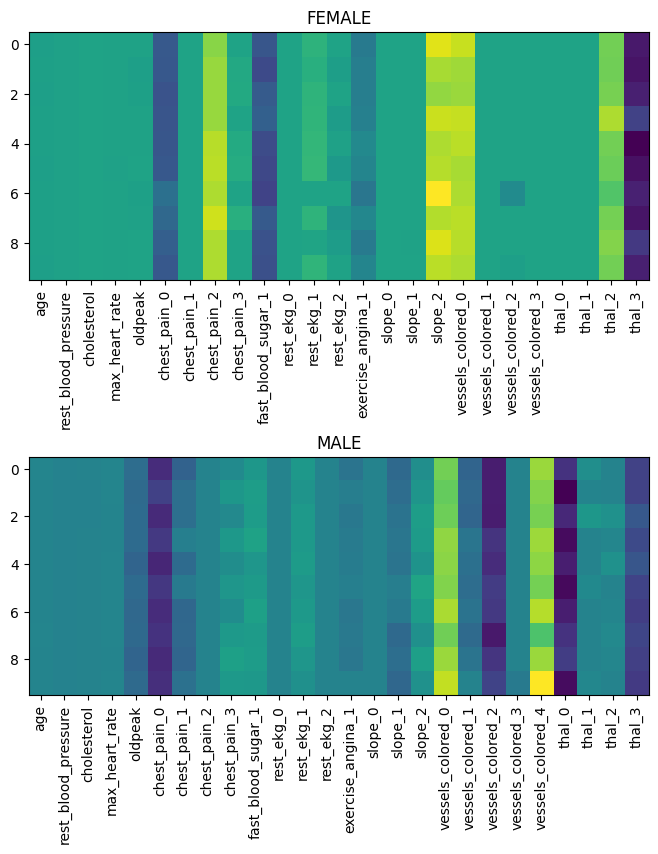

In [31]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.imshow(coefs_f)
plt.xticks(range(len(cols_f)), cols_f, rotation=90)
plt.title('FEMALE')

plt.subplot(212)
plt.imshow(coefs_m)
plt.title('MALE')
plt.xticks(range(len(cols_m)), cols_m, rotation=90)
plt.show()

In [32]:
df_female

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,oldpeak,slope,vessels_colored,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
11,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1004,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [33]:
from scipy import stats as spst
def visualize_by_gender(targ_feat):
    plt.figure(figsize=(12, 3))
    ax = plt.subplot(121)
    pd.crosstab(y_female, df_female[targ_feat]).plot(kind="bar", title=f'FEMALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent','Present'], rotation=0)

    ax = plt.subplot(122)
    pd.crosstab(y_male, df_male[targ_feat]).plot(kind="bar",title=f'MALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent', 'Present'], rotation=0)
    plt.show()

In [34]:
df_female["oldpeak"].unique()

array([1.9, 1. , 1.6, 3. , 0.7, 1.5, 1.1, 0.3, 0. , 3.4, 0.8, 1.2, 0.2,
       6.2, 3.6, 0.9, 0.5, 2.8, 0.6, 4. , 1.4, 0.4, 0.1, 1.3, 1.8, 2. ,
       2.6])

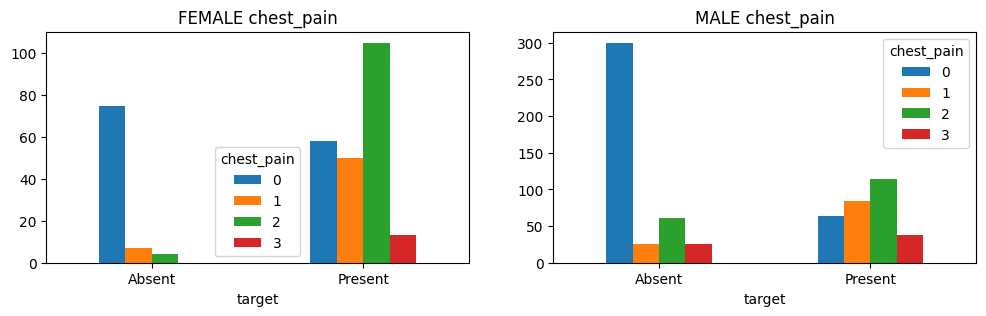

In [35]:
visualize_by_gender('chest_pain')

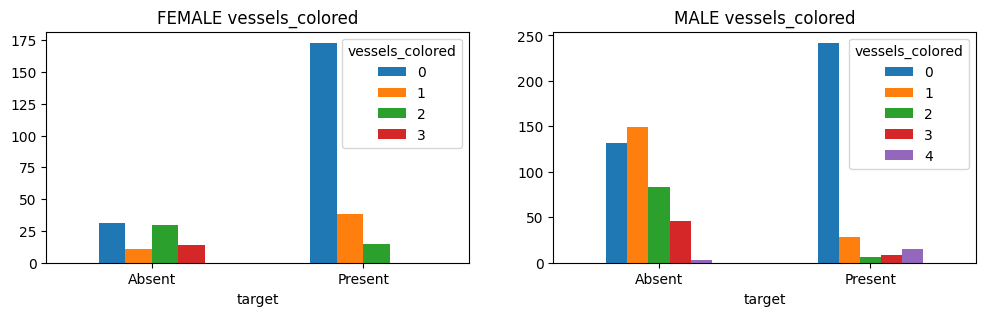

In [36]:
visualize_by_gender('vessels_colored')

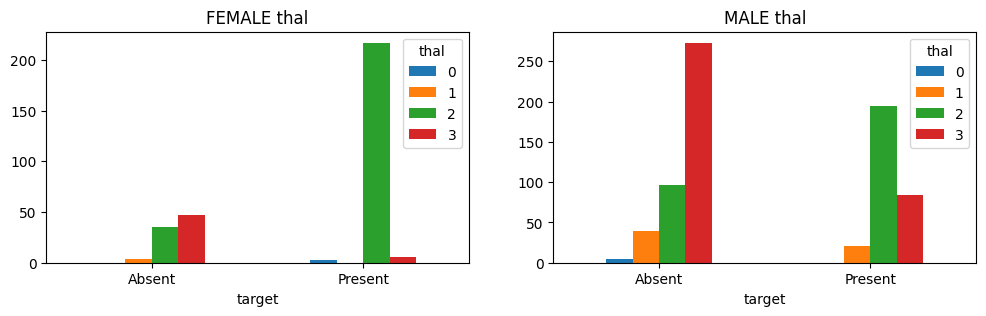

In [37]:
visualize_by_gender('thal')

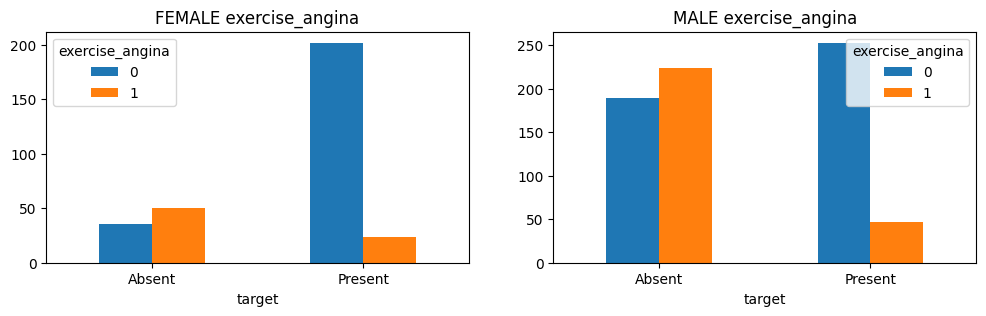

In [38]:
visualize_by_gender('exercise_angina')

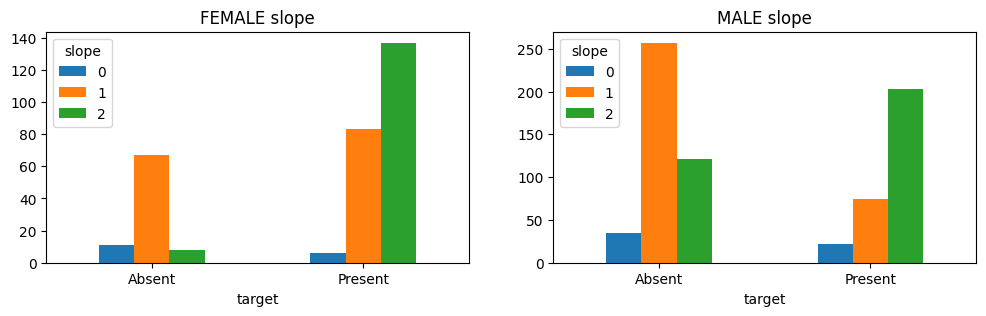

In [39]:
visualize_by_gender('slope')

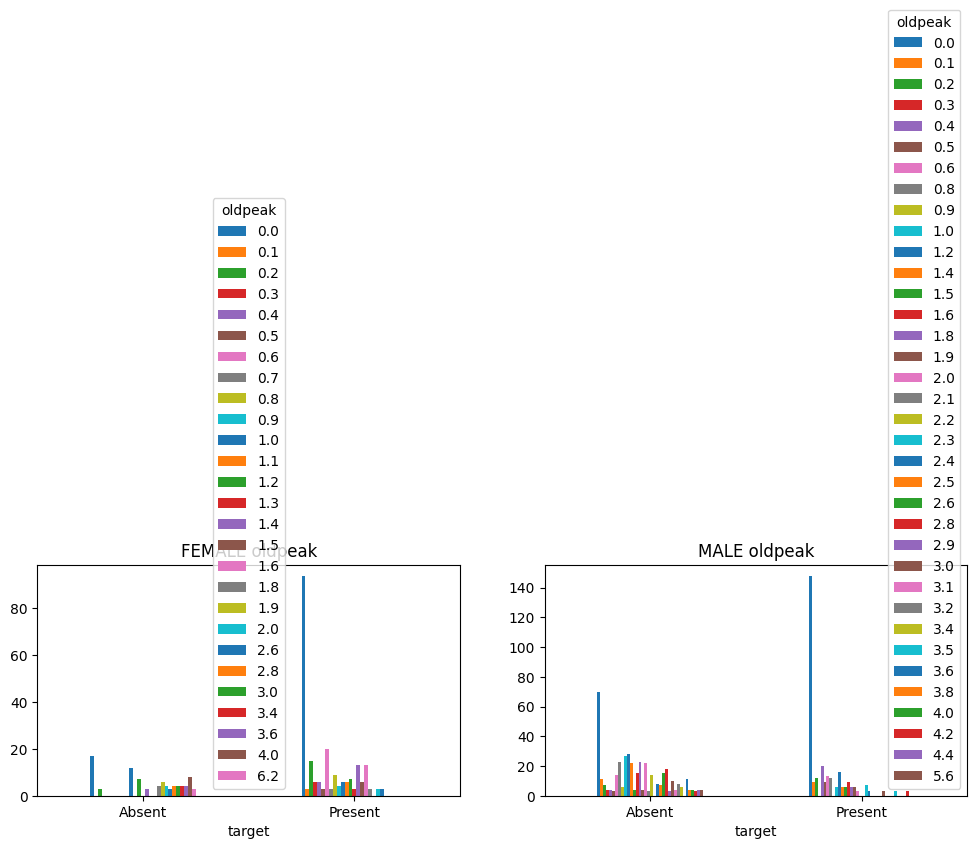

In [40]:
visualize_by_gender("oldpeak")

In [96]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

# Assuming you've already loaded your dataset into 'df'
privileged_group = {'sex': 1}  # Define the privileged group based on your dataset
unprivileged_group = {'sex': 0}  # Define the unprivileged group based on your dataset
privileged_groups = [privileged_group]
unprivileged_groups = [unprivileged_group]

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [97]:
train_bld = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df=pd.concat([X_train, y_train], axis=1), label_names=['target'], protected_attribute_names=['sex'])
test_bld = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df=pd.concat([X_test, y_test], axis=1), label_names=['target'], protected_attribute_names=['sex'])

In [98]:
rw = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
train_bld_reweighed = rw.fit_transform(train_bld)

In [99]:
reweighed_model = RandomForestClassifier(n_estimators=100, random_state=42)
reweighed_model.fit(train_bld_reweighed.features, train_bld_reweighed.labels.ravel())

RandomForestClassifier(random_state=42)

In [100]:
y_pred_reweighed = reweighed_model.predict(test_bld.features)
reweighed_accuracy = accuracy_score(test_bld.labels, y_pred_reweighed)
print(f"Reweighed Model Accuracy: {reweighed_accuracy}")

Reweighed Model Accuracy: 0.9620253164556962


# ATTEMPT 1

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
# exploring the dataset

y = df["target"]
X = df.drop("target",axis=1)

print(sum(X.sex == 1)) # number of men in the dataset
print(sum(X.sex == 0)) # number of women in the dataset

y.unique()

713
312


array([0, 1], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred1 = log.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred1)

0.7853658536585366



# ATTEMPT 2

In [48]:
filtered_df = df.drop(columns=['ca', 'thal'])
filtered_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0


In [49]:
# Referencing https://colab.research.google.com/drive/16iFRPq0vx_CZypo4ZyJ_qTLrvds3FlDb?usp=sharing#scrollTo=89rqWut1SsCu
# for decision tree, lin regression, and one hot encoding
# github link https://github.com/smarthardik10/Heart-Disease-UCI-Diagnosis-Prediction/tree/master

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

# print(filtered_df.shape)
# print(df.shape)
X = filtered_df.iloc[:,0:11] # Features
y = filtered_df.iloc[:,11] # Target variable
# # X = heart_disease.data.features
# # y = heart_disease.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9805194805194806
Accuracy: 0.7857142857142857


In [51]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logre = LogisticRegression()
logre.fit(X_train,y_train)
y_pred = logre.predict(X_test)

C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

*italicized text*# New Section

# ATTEMPT 3

In [53]:
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()

In [54]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [55]:
y = df["target"]
X = df.drop('target',axis=1)

In [56]:
y[y > 0] = 1

C:\Users\RACHIT GALA\AppData\Local\Temp\ipykernel_8636\435600133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1


In [57]:
y.unique()

array([0, 1], dtype=int64)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print(y_train.unique())
print(sum(y_train == 0))
print(sum(y_train == 1))

[1 0]
401
419


confusion matrix
[[ 77  21]
 [  7 100]]




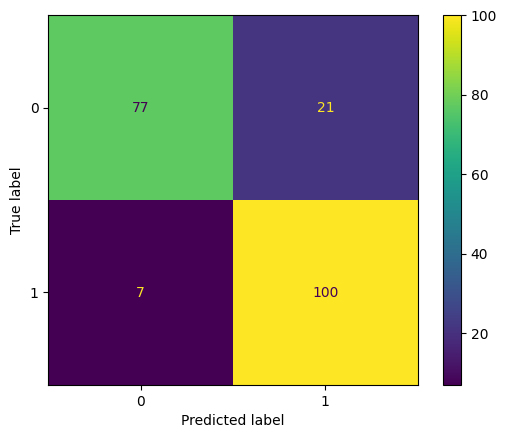

Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [60]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confusion matrix")
print(lr_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[79 19]
 [11 96]]




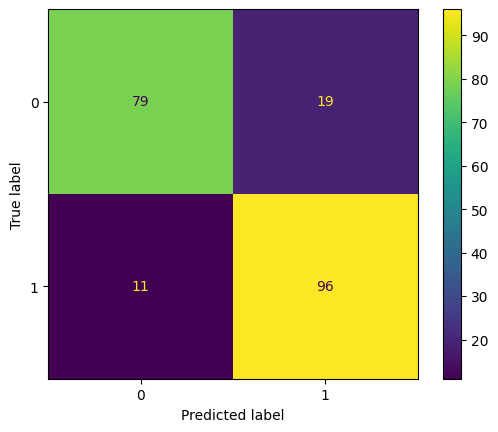

Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [61]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [62]:
X_test_men = X_test[X_test[:, 1] > 0]
y_test_men = y_test[X_test[:, 1] > 0]
X_test_women = X_test[X_test[:, 1] < 0]
y_test_women = y_test[X_test[:, 1] < 0]

nbpred_men = nb.predict(X_test_men)
nbpred_women = nb.predict(X_test_women)

nb_acc_score_men = accuracy_score(y_test_men, nbpred_men)
nb_acc_score_women = accuracy_score(y_test_women, nbpred_women)

print("Accuracy of Naive Bayes model for men:", nb_acc_score_men * 100,'\n')
print("Accuracy of Naive Bayes model for women:", nb_acc_score_women * 100,'\n')

Accuracy of Naive Bayes model for men: 82.35294117647058 

Accuracy of Naive Bayes model for women: 91.30434782608695 



In [63]:
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

In [64]:
# Print the feature ranking
features = X.columns
features_ranked = []
importances_ranked = []
print("Feature ranking:")
for f in range(X_test.shape[1]):
   print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
   features_ranked.append(features[indices[f]])
   importances_ranked.append(importances[indices[f]])

Feature ranking:
1. oldpeak (0.061463)
2. exang (0.044878)
3. cp (0.038049)
4. thal (0.030244)
5. sex (0.018537)
6. ca (0.012683)
7. thalach (0.012683)
8. slope (0.003902)
9. age (0.001951)
10. chol (-0.000976)
11. fbs (-0.002927)
12. trestbps (-0.003902)
13. restecg (-0.009756)


In [65]:
importances

array([ 0.00195122,  0.01853659,  0.03804878, -0.00390244, -0.00097561,
       -0.00292683, -0.0097561 ,  0.01268293,  0.04487805,  0.06146341,
        0.00390244,  0.01268293,  0.0302439 ])

C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\RACHIT GALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical

<Axes: >

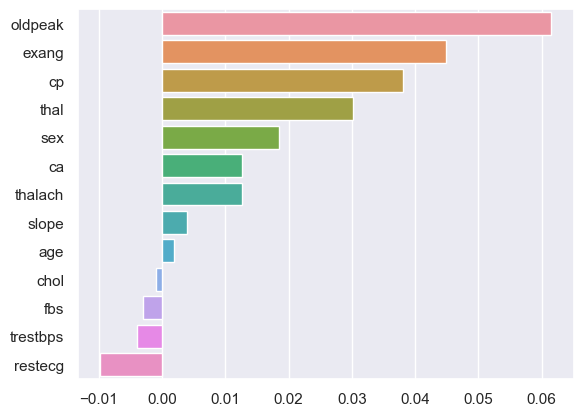

In [66]:
import seaborn as sns
# sns.barplot(data=importances)
sns.set()
sns.barplot(x=importances_ranked,y=features_ranked)

In [67]:
df_X_train = pd.DataFrame(X_train, columns=X.columns)
df_X_test = pd.DataFrame(X_test, columns=X.columns)

important_features = features_ranked[:7]
# important_features
df_X_train_new = df_X_train[important_features]
df_X_test_new = df_X_test[important_features]

X_train_new = df_X_train_new.to_numpy()
X_test_new = df_X_test_new.to_numpy()

In [68]:
sum(df_X_test["sex"] < 0)

69

confusion matrix
[[81 17]
 [10 97]]




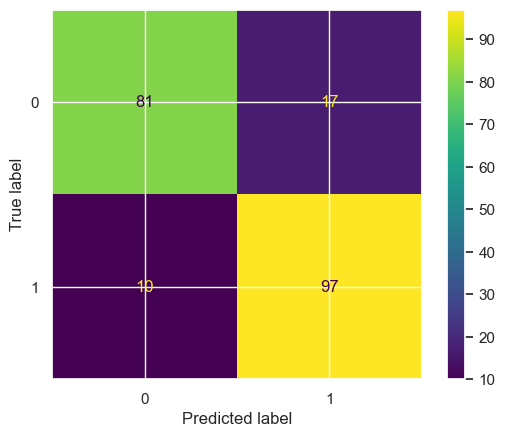

Accuracy of New Naive Bayes model: 86.82926829268293 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        98
           1       0.85      0.91      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [69]:
m2_new = 'Naive Bayes w Top 7 Most Important Features'
nb_new = GaussianNB()
nb_new.fit(X_train_new, y_train)
nb_new_pred = nb_new.predict(X_test_new)
nb_new_conf_matrix = confusion_matrix(y_test, nb_new_pred)
nb_new_acc_score = accuracy_score(y_test, nb_new_pred)

print("confusion matrix")
print(nb_new_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_new_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of New Naive Bayes model:",nb_new_acc_score*100,'\n')
print(classification_report(y_test,nb_new_pred))

confusion matrix
[[ 98   0]
 [  0 107]]




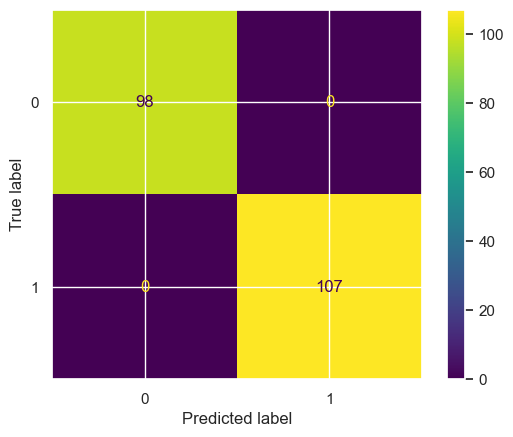

Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [70]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confusion matrix")
print(rf_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Random Forest:",rf_acc_score * 100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[ 91   7]
 [  3 104]]




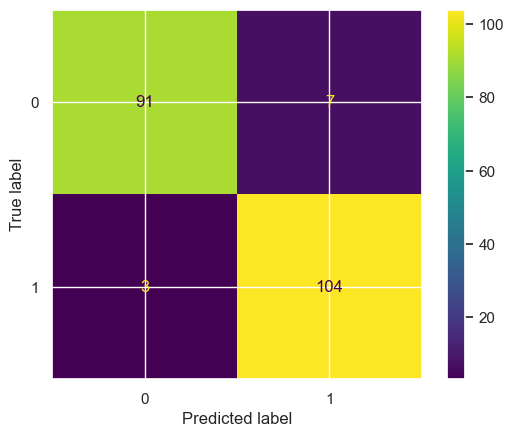

Accuracy of Extreme Gradient Boost: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.94      0.97      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [71]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("confusion matrix")
print(xgb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Extreme Gradient Boost:",xgb_acc_score * 100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[84 14]
 [11 96]]




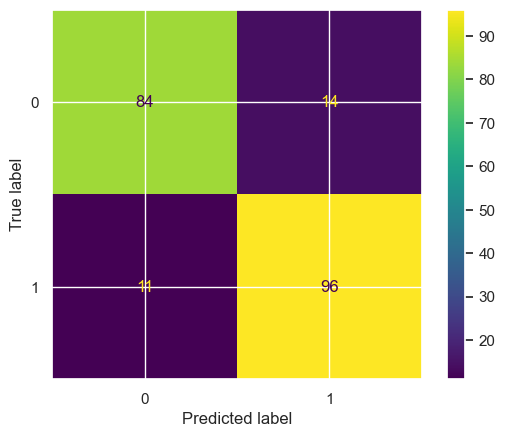

Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [72]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confusion matrix")
print(knn_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

# Normalization

In [73]:
# ## try w and w/o normalizing number of men & women
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()


In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [75]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
# idk try w/o scaling?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


confusion matrix
[[79 19]
 [11 96]]




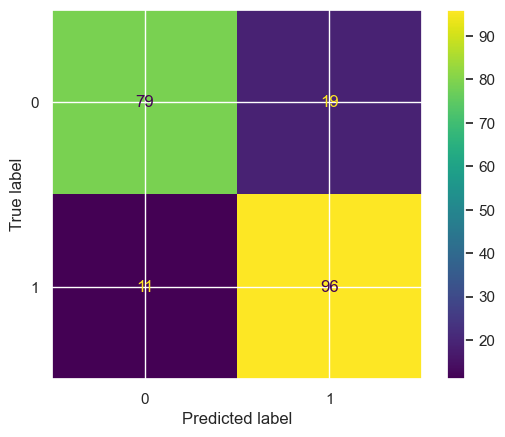

Accuracy of Naive Bayes model w/o Scaling: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [78]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [79]:
# try undersampling // currently giving same result as un-scaled, maybe the variables need to be renamed
import pandas as pd

# probably a better way than just rng ... but idk
male_indices = df[df.sex == 1].index
female_indices = df[df.sex == 0].index

print(len(male_indices))
print(len(female_indices))

random_male_indices = np.random.choice(male_indices, 79, replace=False)
random_male_sample = df.loc[random_male_indices]
print(random_male_sample.shape)

female_sample = df.loc[female_indices]
print(female_sample.shape)

df = pd.concat([female_sample, random_male_sample])
print(df.shape)

df.describe()

y = df["target"]
X = df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


713
312
(79, 14)
(312, 14)
(391, 14)


confusion matrix
[[23  3]
 [ 4 49]]




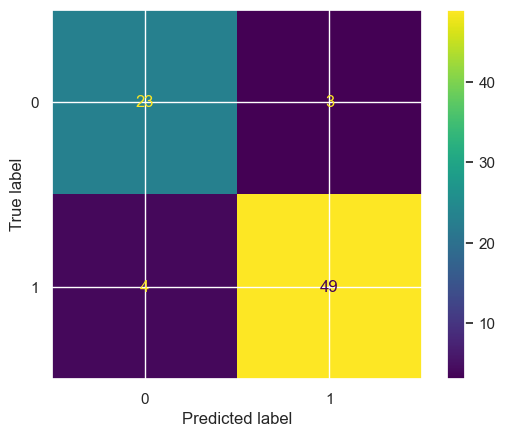

Accuracy of Naive Bayes model w/o Scaling: 91.13924050632912 

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.94      0.92      0.93        53

    accuracy                           0.91        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.91      0.91      0.91        79



In [80]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

***Model Improvement***

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2022)

In [82]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
svc = SVC(kernel = 'sigmoid', gamma = 1.0) 
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') 


In [83]:
voting = VotingClassifier(estimators=[('gbdt', gbdt), ('abc', abc), ('dtc', dtc), ('etc', etc)],voting='soft')

In [84]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('abc', AdaBoostClassifier(random_state=2)),
                             ('dtc', DecisionTreeClassifier(max_depth=5)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

0.9493670886075949
[[23  1]
 [ 3 52]]
0.9811320754716981


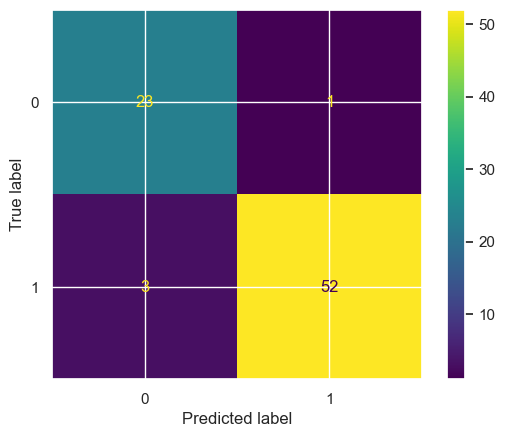

In [85]:
y_pred = voting.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

# voting model is most accurate and precise


In [86]:
# Create transformers for scaling
numeric_transformer = ('scale', MinMaxScaler(), columns_to_scale)
#categorical_transformer = ('encode',LabelEncoder(),encoded_columns)

In [87]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[numeric_transformer],

    remainder='passthrough'
)

In [88]:
# Create the RandomForestClassifier
# random_forest_model = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(learning_rate=0.01, n_estimators=25)
voting = VotingClassifier(estimators=[('gbdt', gbdt), ('abc', abc), ('dtc', dtc), ('etc', etc)],voting='soft')

In [89]:

# Create the pipeline with SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', voting)
])



In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2022)

In [91]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
457,39,0,2,138,220,0,1,152,0,0.0,1,0,2
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3
523,61,1,0,148,203,0,1,161,0,0.0,2,1,3
797,65,0,0,150,225,0,0,114,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,54,0,2,135,304,1,1,170,0,0.0,2,0,2
408,46,0,0,138,243,0,0,152,1,0.0,1,0,2
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2
693,63,0,1,140,195,0,1,179,0,0.0,2,2,2


In [92]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['oldpeak', 'thalach', 'chol',
                                                   'trestbps', 'age'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 VotingClassifier(estimators=[('gbdt',
                                               GradientBoostingClassifier(n_estimators=50,
                                                                          random_state=2)),
                                              ('abc',
                                               AdaBoostClassifier(random_state=2)),
                                              ('dtc',
                                               DecisionTreeClassifier(max_depth=5)),
                                              ('etc',
                                               ExtraTreesClassifier(n_estimators=50,
                                                                    random_state=2))],
                                  voting='soft'))])

In [93]:
# Evaluate the pipeline on the test set
accuracy = pipeline.score(X_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")
y_pred=pipeline.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
print("MEAN_ABSOLUTE_ERROR:",MAE)

Pipeline Accuracy: 0.95
MEAN_ABSOLUTE_ERROR: 0.05063291139240506


In [94]:
file_path = "pipeline_model_1.pkl"

In [95]:
with open(file_path, "wb") as f:
    pickle.dump(pipeline,f)